In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('../Delhi_v2.csv')

In [3]:
# data.info()

In [4]:
data = data.drop(['Landmarks','Furnished_status','Price_sqft','Address','Status','neworold','type_of_building','desc', 'Unnamed: 0'], axis=1)

In [5]:
from sklearn.model_selection import train_test_split
x = data.drop(['price'], axis = 1)
y = data['price']

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2)

In [7]:
train_data = X_train.join(Y_train)

array([[<Axes: title={'center': 'area'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'longitude'}>],
       [<Axes: title={'center': 'Bedrooms'}>,
        <Axes: title={'center': 'Bathrooms'}>,
        <Axes: title={'center': 'Balcony'}>],
       [<Axes: title={'center': 'parking'}>,
        <Axes: title={'center': 'Lift'}>,
        <Axes: title={'center': 'price'}>]], dtype=object)

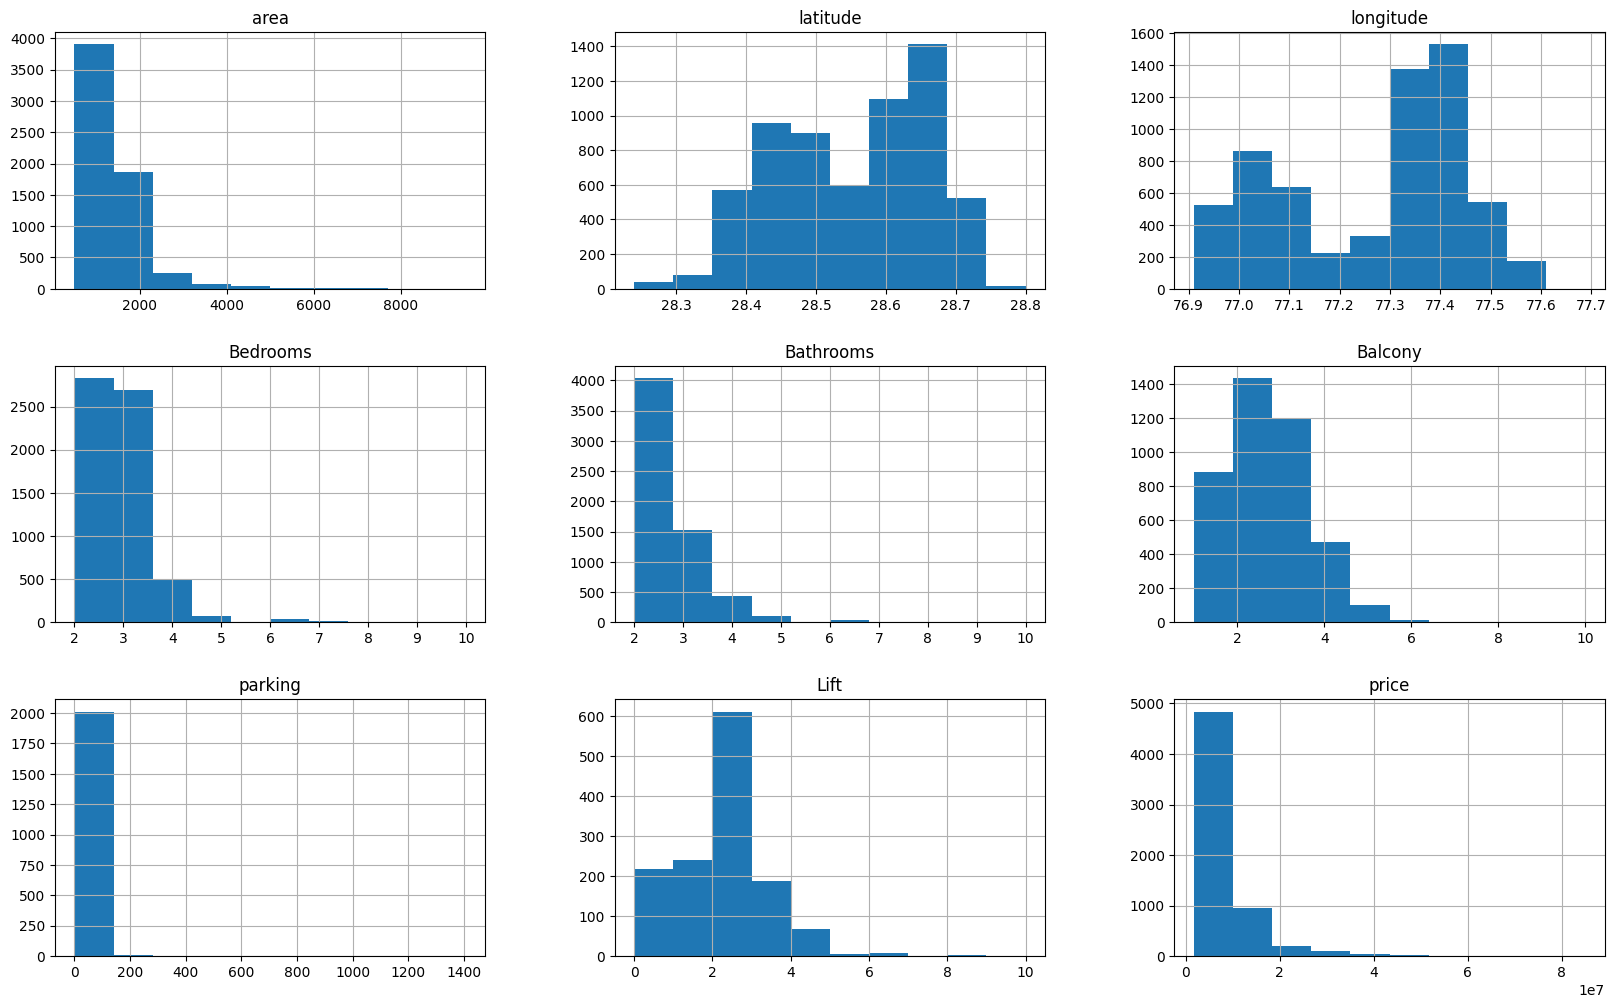

In [8]:
train_data.hist(figsize=(20,12))

<Axes: >

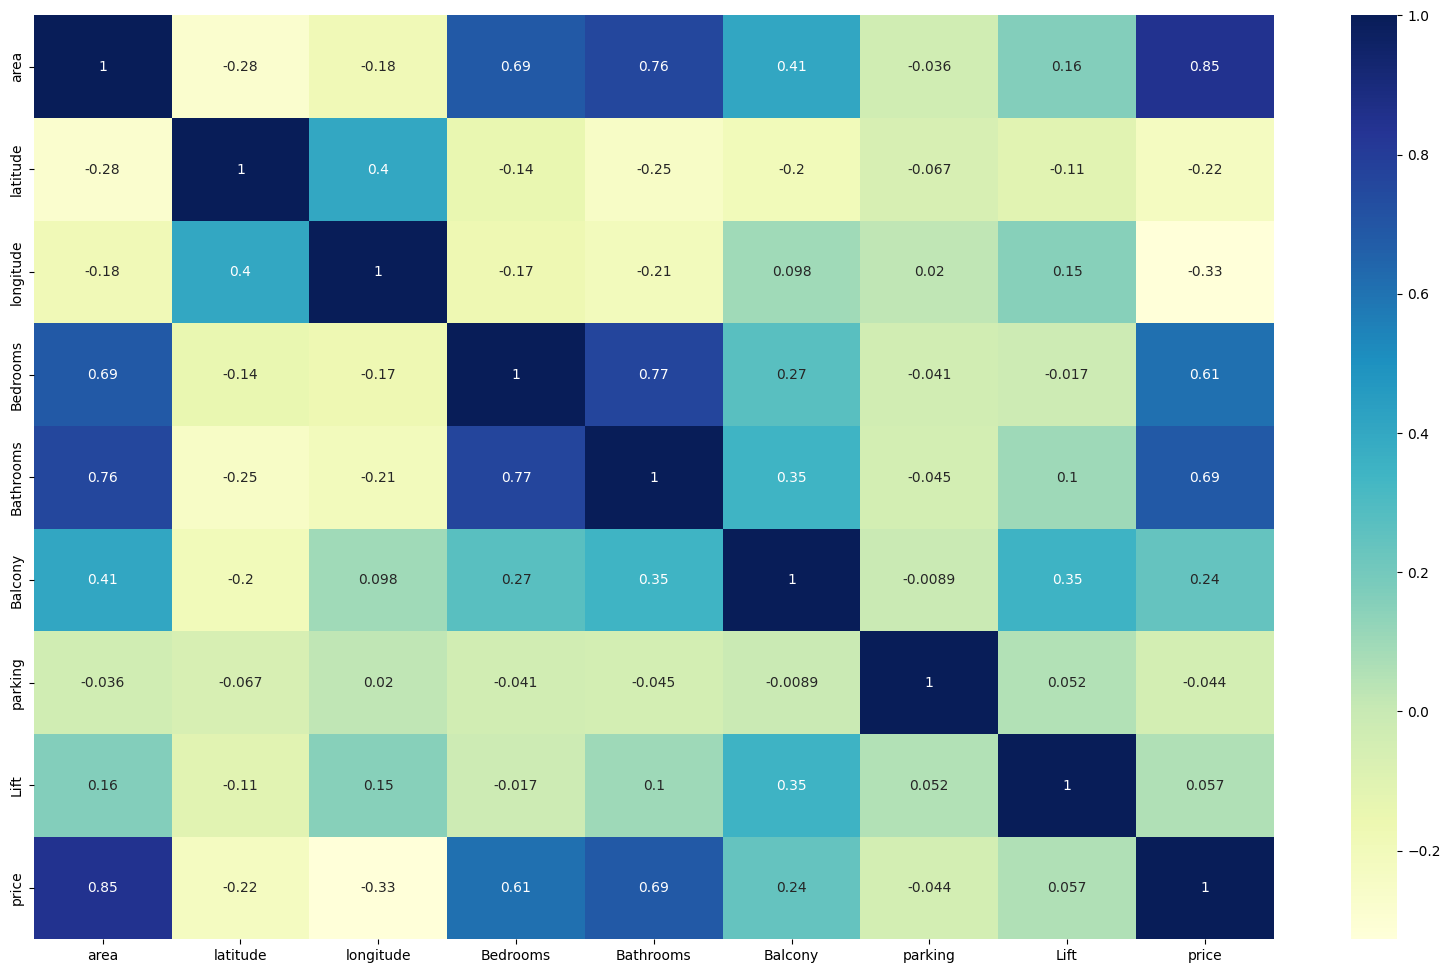

In [9]:
plt.figure(figsize=(20, 12))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

In [10]:
#preprocessing
# train_data['Bedrooms'] = np.log(train_data['Bedrooms'] + 1)
# train_data['parking'] = np.log(train_data['parking'] + 1)
# train_data['Lift'] = np.log(train_data['Lift'] + 1)
# train_data['Bathrooms'] = np.log(train_data['Bathrooms'] + 1)

In [11]:
# train_data.hist(figsize=(20,12))

<Axes: xlabel='latitude', ylabel='longitude'>

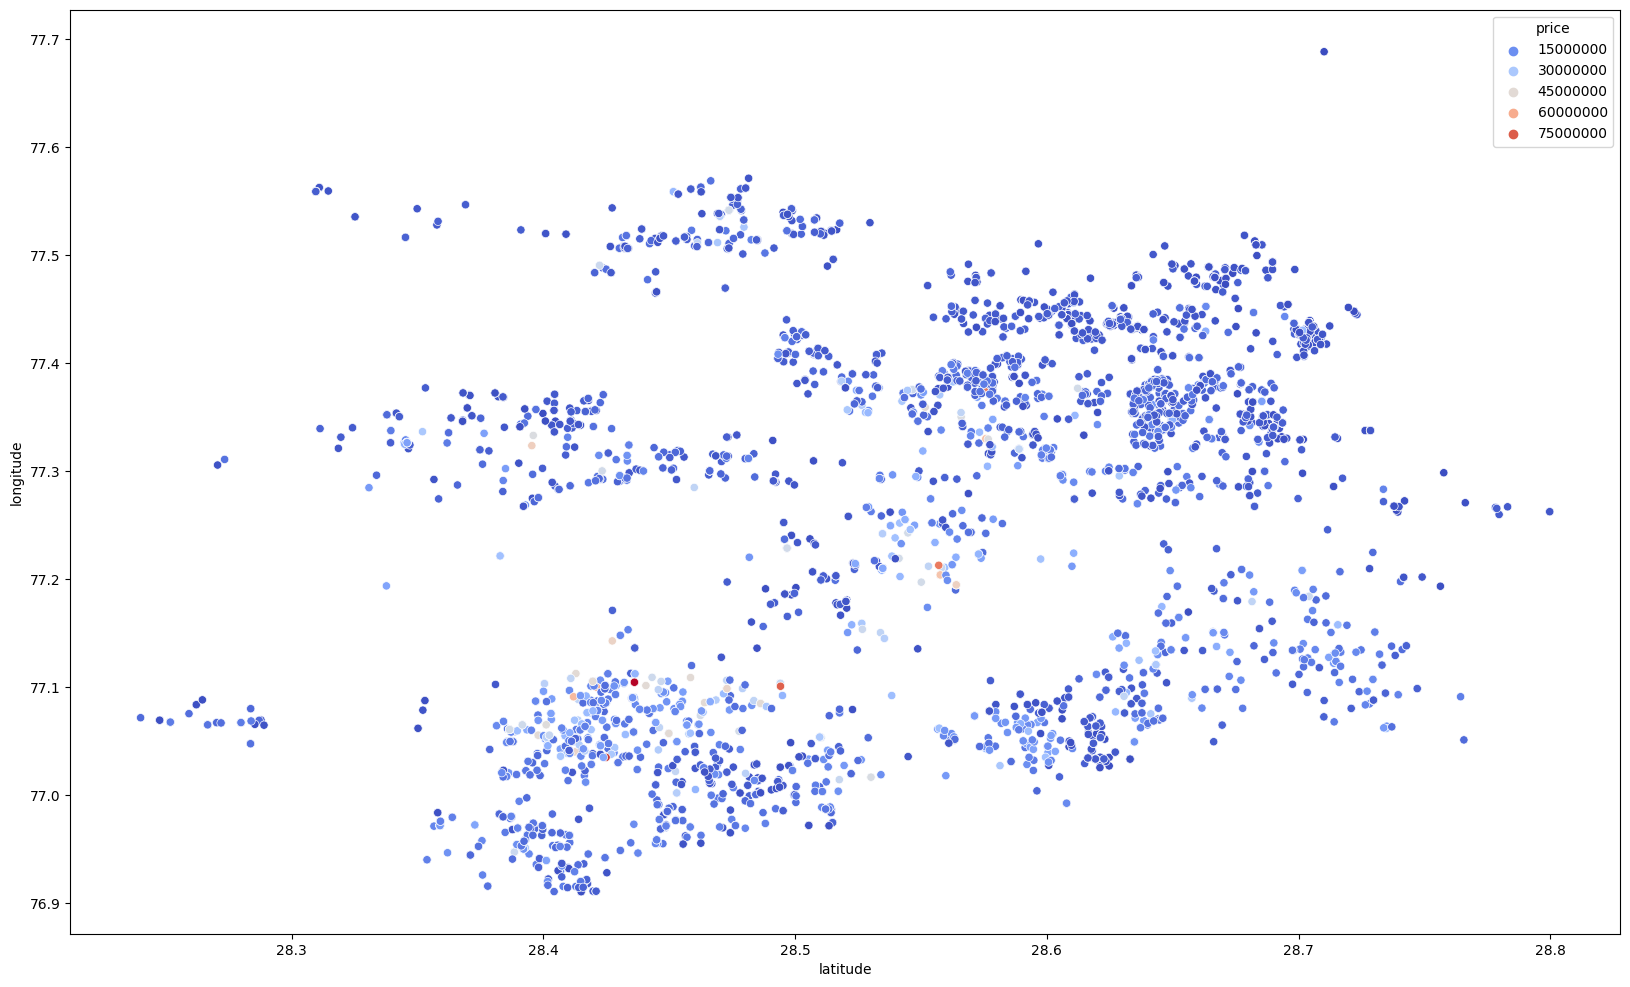

In [12]:
plt.figure(figsize=(20, 12))
sns.scatterplot(x='latitude', y='longitude', data=train_data, hue='price', palette='coolwarm')

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
train_data.fillna(0, inplace=True)
X_train = train_data.drop(['price'], axis=1),
Y_train = train_data['price']

In [15]:
reg = LinearRegression()
reg.fit(X_train[0], Y_train)

LinearRegression()

In [16]:
test_data = X_test.join(Y_test)

In [17]:
# test_data['Bedrooms'] = np.log(test_data['Bedrooms'] + 1)
# test_data['parking'] = np.log(test_data['parking'] + 1)
# test_data['Lift'] = np.log(test_data['Lift'] + 1)
# test_data['Bathrooms'] = np.log(test_data['Bathrooms'] + 1)

In [18]:
test_data.fillna(0, inplace=True)

In [19]:
X_test = test_data.drop(['price'], axis=1)

In [20]:
Y_test = test_data['price']

In [21]:
reg.score(X_test, Y_test)

0.7801655838004978

In [22]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
forest.fit(X_train[0].drop(['latitude', 'longitude'],axis=1), Y_train)

RandomForestRegressor()

In [23]:
forest.score(X_test.drop(['latitude', 'longitude'],axis=1), Y_test)

0.7666503459883796

In [26]:
test_data

,area,latitude,longitude,Bedrooms,Bathrooms,Balcony,parking,Lift,price
4703,830.0,28.399675,77.302355,2.0,2.0,0.0,0.0,0.0,3500000.0
2080,1766.0,28.400922,77.519690,3.0,4.0,4.0,0.0,0.0,8500000.0
3456,910.0,28.605958,77.444512,2.0,2.0,0.0,0.0,0.0,3800000.0
4092,1190.0,28.577679,77.314900,2.0,2.0,0.0,0.0,0.0,4600000.0
5729,1126.0,28.534830,77.209778,2.0,2.0,2.0,0.0,0.0,11200000.0
...,...,...,...,...,...,...,...,...,...
5342,1600.0,28.664488,77.347494,3.0,2.0,2.0,1.0,2.0,8000000.0
6507,1337.0,28.406523,77.342993,2.0,2.0,2.0,0.0,0.0,4200000.0
2862,1300.0,28.666747,77.479096,3.0,3.0,3.0,1.0,2.0,4000000.0
1396,3875.0,28.485865,77.057693,4.0,5.0,4.0,0.0,0.0,39000000.0
